Data Found!
Making items...
Finished!
Training...
Testing...
Error for Linear Regression: 0.0097317455439
Error for SVM RBF: 0.00494347754726
Done!


C:\Users\ForceM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


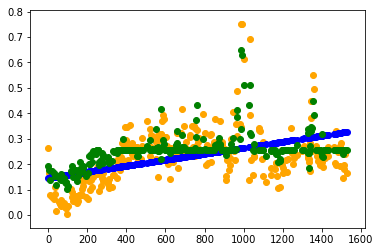

In [3]:
# %load DataReader.py
import xlrd
import json
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import datetime

class item(): #Our objects of items with their features

    def __init__(self, name, price_history, weapon_type, rarity, wear, stattrak):

        self.name = name
        start_date = datetime.date(2013, 8, 15)
        self.price_history = price_history['prices']
        for i in range(len(self.price_history)):
            date = self.price_history[i][0].split()
            
            month_list = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
            year = date[2]
            day = date[1]
            month = month_list.index(date[0]) + 1
            release_date = datetime.date(int(year), int(month), int(day))
            diff_date = release_date - start_date
            self.price_history[i][0] = diff_date.days
            
        
        self.weapon_type = weapon_type
        self.rarity = rarity
        self.wear = wear
        self.stattrak = stattrak
        self.data = [self.weapon_type, self.rarity, self.wear, self.stattrak]
        self.target = price_history


def makeItems():
    print("Making items...")
    checker = " " #checker will later be set to value in excel file
    item_array = [] #our array our objects
    wears = ["Battle-Scarred", "Well-Worn", "Field-Tested", "Minimal Wear", "Factory New"]
    y = 1
    while(checker != "NULL"):  #checks to see if we are at end of excel file
        if(str(sheet.cell_value(y, 0)) != "NULL"):
            wep_wear = wears[int((sheet.cell_value(y, 4)) - 1)]
            string = str((sheet.cell_value(y, 0)) + " - " + str(wep_wear)) 
            with open("data points/" + string + ".json") as data_file: #opens a json file that has the same name as the name attribute
                data = json.load(data_file) #loads the content of file, which contains an array of its pricing history
                #print(data)
            prices = data
            thing = item(sheet.cell_value(y, 0), prices, sheet.cell_value(y, 2), sheet.cell_value(y, 3), sheet.cell_value(y, 4), sheet.cell_value(y, 5)) #create an object with all of the dat from json and excel file
            item_array.append(thing) #append it to our object list
            
        y = y + 1 #increment and update our checker for the end of the file
        checker = sheet.cell_value(y, 0)
    print("Finished!")
    return item_array






file_location = "C:/Users/ForceM/AppData/Local/Programs/Python/Python35-32/item_prices/DataReader.xlsx" #opens a excel file with our data
print("Data Found!")
workbook = xlrd.open_workbook(file_location)
sheet = workbook.sheet_by_index(0)
items = []
items = makeItems()
print("Training...")
learning_rate = 0.001
num_iterations = 50
single = 42 #determine what item we want to test single

#good examples = 23, 14, 13 is really good, 5, 6
#bad exmaples = 0, 1, 2, 3, 4?, 7, 8, 16 is bad, 17ish, 

total_item = 0
for t in range(36):
    total_item += int(len(items[t].price_history))
    

total_test = 0
for t in range(12):
    total_test += int(len(items[t+36].price_history))


one_item_matrix = np.zeros(((len(items[single].price_history)), 6))
items_matrix = np.zeros((total_item+total_test, 6))

z = 0
for i in range(len(items[single].price_history)):
    one_item_matrix[z] = [items[single].data[0], items[single].data[1], items[single].data[2], items[single].data[3], items[single].price_history[i][0], items[single].price_history[z][1]]
    z += 1
    


z = 0
for i in range(48):
    for j in range(len(items[i].price_history)):
        items_matrix[z] = [items[i].data[0], items[i].data[1], items[i].data[2], items[i].data[3], items[i].price_history[j][0], items[i].price_history[j][1]]
        z += 1
        
        
np.random.shuffle(one_item_matrix)     
np.random.shuffle(items_matrix)

num_rows, num_cols = items_matrix.shape
num_rows_one, num_cols_one = one_item_matrix.shape

num_train_one = int(num_rows_one * 0.8)
num_test_one = num_rows_one - num_train_one


#num_train = int(num_rows * 0.8)
#num_test = num_rows - num_train

price_history = np.zeros((num_train_one, 1))
items_to_train = np.zeros((num_train_one, 5))
price_test = np.zeros((num_test_one, 1))
days_test = np.zeros((num_test_one, 1))
days_train = np.zeros((num_train_one, 1))
items_to_test = np.zeros((num_test_one, 5))
        
#price_history = np.zeros((num_train, 1))
#items_to_train = np.zeros((num_train, 5))
#price_test = np.zeros((num_test, 1))
#days_test = np.zeros((num_test, 1))
#days_train = np.zeros((num_train, 1))
#items_to_test = np.zeros((num_test, 5))

b = 0
nor_m = np.zeros((num_rows_one, 1))
for h in range(len(one_item_matrix)):
    nor_m[b] = ([one_item_matrix[h][5]])
    b += 1

        

#nor_m = (nor_m - nor_m.mean()) / (nor_m.max() - nor_m.min())
nor_m = (nor_m - nor_m.min()) / (nor_m.max() - nor_m.min())





n = 0
for k in range(num_train_one):
    items_to_train[n] = [one_item_matrix[k][0], one_item_matrix[k][1], one_item_matrix[k][2], one_item_matrix[k][3], one_item_matrix[k][4]]
    #price_history[n] = [one_item_matrix[k][5]]
    price_history[n] = nor_m[n]
    days_train[n] = [one_item_matrix[k][4]]
    n += 1
        
m = 0
for v in range(num_test_one):
    items_to_test[m] = [one_item_matrix[v][0], one_item_matrix[v][1], one_item_matrix[v][2], one_item_matrix[v][3], one_item_matrix[v][4]]
    #price_test[m] = [one_item_matrix[v][5]]
    price_test[m] = nor_m[m]
    days_test[m] = [one_item_matrix[v][4]]
    m += 1
        
#n = 0
#for k in range(num_train):
#    items_to_train[n] = [items_matrix[k][0], items_matrix[k][1], items_matrix[k][2], items_matrix[k][3], items_matrix[k][4]]
#    price_history[n] = [items_matrix[k][5]]
#    #price_history[n] = nor_m[n]
#    days_train[n] = [items_matrix[k][4]]
#    n += 1
#        
#m = 0
#for v in range(num_test):
#    items_to_test[m] = [items_matrix[v][0], items_matrix[v][1], items_matrix[v][2], items_matrix[v][3], items_matrix[v][4]]
#    price_test[m] = [items_matrix[v][5]]
#    #price_test[m] = nor_m[m]
#    days_test[m] = [items_matrix[v][4]]
#    m += 1
        
        

items_X_train = np.matrix(items_to_train)
items_Y_train = price_history

#items_Y_train = (items_Y_train - items_Y_train.mean()) / (items_Y_train.max() - items_Y_train.min())

items_X_test = np.matrix(items_to_test)
items_Y_test = price_test

print("Testing...")




#regr = linear_model.LogisticRegression()
#regr.fit(items_X_train, items_Y_train.ravel())

regr = linear_model.LinearRegression()
regr.fit(items_X_train, items_Y_train)

items_Y_pred = regr.predict(items_X_test)

print("Error for Linear Regression: ", end="")
print(mean_squared_error(items_Y_test, items_Y_pred))



svr_rbf = SVR(kernel='rbf')
y_rbf = svr_rbf.fit(items_X_train, items_Y_train).predict(items_X_test)

print("Error for SVM RBF: ", end='')
print(mean_squared_error(items_Y_test, y_rbf))

#svr_poly = SVR(kernel='poly', degree=2)
#items_Y_ravel = np.ravel(items_Y_train)
#items_Y_ravel = np.array(items_Y_train)
#y_poly = svr_poly.fit(items_X_train, items_Y_train).predict(items_X_train)


print("Done!")


#plt.scatter(items_Y_train, y_rbf, color='black')

plt.scatter(days_test, items_Y_test, color='orange')
plt.scatter(days_test, items_Y_pred, color='blue')
plt.scatter(days_test, y_rbf, color='green')



#plt.scatter(day_train, y_poly, color='red')

#plt.xticks("Days on Market")
#plt.yticks("Price in US Dollar")

#print(svr_rbf.coef_)
#print(items_Y_test[1])
#print(items_Y_pred[1])

#print(items_Y_test.shape)

plt.show()


In [14]:
print(5)

5
